In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('C:/Users/lucyf/Coding/Homelessness-reasons/data/master_df.csv')

In [2]:
X = df[['total_prevention_duty']]
y = df['total_successful_prevention']

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

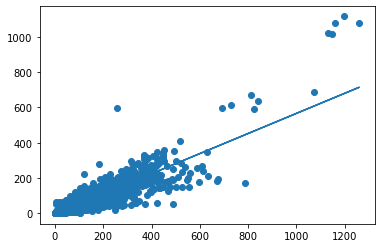

In [3]:
plt.scatter(X, y)
plt.plot(X, y_pred)
plt.show()

In [4]:
model.score(X, y)

0.7813398872253807

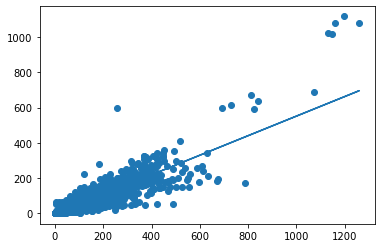

<Figure size 432x288 with 0 Axes>

In [5]:
X = df[['total_prevention_duty']]
y = df['total_successful_prevention']

X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

plt.scatter(X, y)
plt.plot(X_test, y_pred)
plt.show()
plt.clf()

In [6]:
model.score(X_test, y_test)

0.7741075834830209

In [7]:
df = df.dropna()

In [8]:
df.isnull().sum()

Unnamed: 0                          0
ONS_code                            0
local_authority                     0
total_prevention_duty               0
AST_total                           0
AST_arrears_budgeting               0
AST_arrears_rent_increase           0
AST_arrears_employment_reduction    0
AST_arrears_benefit_reduction       0
AST_arrears_personal_circs          0
AST_breach                          0
AST_LL_sell_relet                   0
AST_disrepair_complaint             0
AST_illegal_eviction                0
AST_abandoned                       0
AST_other                           0
non_AST_private_let                 0
family_friends                      0
relationship_breakdown              0
domestic_violence                   0
other_violence                      0
social_total                        0
social_arrears                      0
social_breach                       0
social_other                        0
supported_total                     0
supported_ar

In [9]:
X = df[['total_prevention_duty', 'AST_total', 'year', 'quarter', 'population_density', 'percent_unemployed', 'deprivation_score']]
y = df['total_successful_prevention']

X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

model.score(X_test, y_test)

0.7324049486624278

In [10]:
df.region_name.unique()

array(['South East', 'North West', 'East Midlands', 'East  ', 'London',
       'Yorkshire and The Humber', 'South West', 'West Midlands',
       'North East'], dtype=object)

In [11]:
df.shape

(2125, 57)

In [12]:
model.coef_

array([ 7.72263795e-01, -5.12863737e-01,  1.41244052e+00,  1.87377236e-01,
        2.77263029e-04, -8.18044652e+00,  7.74694347e-02])

In [13]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

906.2146317617239

In [14]:
X = df.dropna()[['total_prevention_duty', 'AST_total', 'year', 'quarter', 'population_density', 'percent_unemployed', 'deprivation_score', 'HPG_grant']]
y = df.dropna()['total_successful_prevention']

X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

(print(model.score(X_test, y_test)))
(print(model.coef_))

0.7325081047130239
[ 90.75914545 -17.72888216   0.68396082   0.18341457   1.04453632
  -9.54639794   0.52200376  -0.34537575]


In [18]:
from sklearn.feature_selection import RFE
 
# Initialize RFE with the linear regression model and the desired number of features to select
rfe = RFE(model, n_features_to_select=6)

# Fit RFE on the training data to select the most important features
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X.columns[rfe.support_]
selected_features

print(rfe.ranking_)

[1 1 1 3 1 1 1 2]


In [19]:
rfe.score(X_test, y_test)

0.7323019540679276

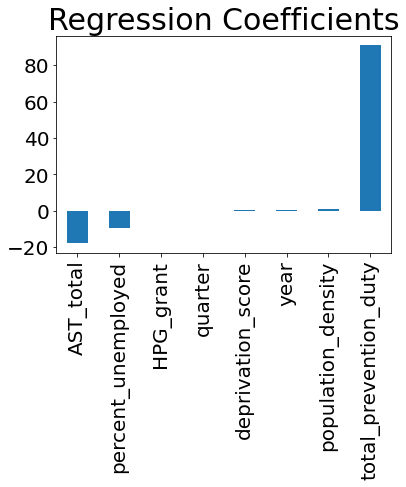

In [23]:
predictors = X.columns
coef = pd.Series(model.coef_,predictors).sort_values()

plt.figure()
coef.plot(kind='bar', fontsize = 20)
plt.title ("Regression Coefficients", fontsize = 30)
plt.show()